In [0]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2 # comparez vos resultats à une implementation opencv

from skimage import data

matplotlib.rcParams['font.size'] = 18

names = ['astronaut',
          'binary_blobs',
          'camera',
          'checkerboard',
          'chelsea',
          'clock',
          'coffee',
          'coins',
          'horse',
          'logo',
          'page',
          'text',
          'rocket']

images = {}
for name in names:
    caller = getattr(data, name)
    image = caller()
    images[name] = image.copy()

In [26]:
for name in images:
  img = images[name]
  print('name: ', name, ' rank: ', img.ndim, ' shape: ', img.shape, ' dtype: ', img.dtype)

name:  astronaut  rank:  3  shape:  (512, 512, 3)  dtype:  uint8
name:  binary_blobs  rank:  2  shape:  (512, 512)  dtype:  bool
name:  camera  rank:  2  shape:  (512, 512)  dtype:  uint8
name:  checkerboard  rank:  2  shape:  (200, 200)  dtype:  uint8
name:  chelsea  rank:  3  shape:  (300, 451, 3)  dtype:  uint8
name:  clock  rank:  2  shape:  (300, 400)  dtype:  uint8
name:  coffee  rank:  3  shape:  (400, 600, 3)  dtype:  uint8
name:  coins  rank:  2  shape:  (303, 384)  dtype:  uint8
name:  horse  rank:  2  shape:  (328, 400)  dtype:  bool
name:  logo  rank:  3  shape:  (500, 500, 4)  dtype:  uint8
name:  page  rank:  2  shape:  (191, 384)  dtype:  uint8
name:  text  rank:  2  shape:  (172, 448)  dtype:  uint8
name:  rocket  rank:  3  shape:  (427, 640, 3)  dtype:  uint8


In [0]:
def uint8_RGB_to_float32(img):
  return img.astype(np.float32)/255.0

def uint8_GRAY_to_float32(img):
  img = img.astype(np.float32)/255.
  img = np.expand_dims(img, axis=-1)
  # img = np.tile(img, (1, 1, 3))
  return img

def bool_to_float32(img):
  img = img.astype(np.float32)
  img = np.expand_dims(img, axis=-1)
  # img = np.tile(img, (1, 1, 3))
  return img

def float32_to_uint8(img):
	img = 255.*img
	return img.astype(np.uint8)

def to_float32(img):
  if img.dtype == 'uint8':
    if img.ndim == 2:
      return uint8_GRAY_to_float32(img)
    else:
      return uint8_RGB_to_float32(img)
  if img.dtype == 'bool':
    return bool_to_float32(img)

for name in images:
  img = images[name]
  img = to_float32(img)
  images[name] = img

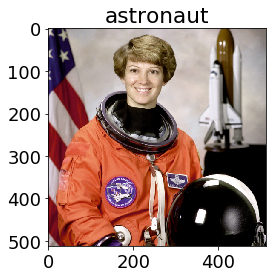

(512, 512, 3)


In [28]:
def imshow(img, title=''):
    plt.title(title)
    if image.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        if img.shape[2] == 1:
          img = np.repeat(img, repeats=3, axis=2)
        plt.imshow(img)
    
    plt.show()

imshow(images['astronaut'], 'astronaut')
print(images['astronaut'].shape)

In [0]:
def rotate90(image):
  h,w,c = np.shape(image)
  rot = np.zeros(image.shape)
  for i in range(h):
    rot[i]=image[i,::-1]
  rot = np.reshape(rot, (h*w,c),order='C')
  return np.reshape(rot, (w,h,c), order='F')

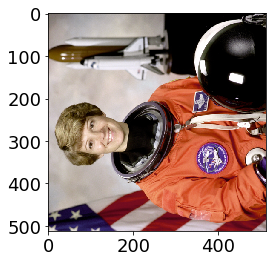

In [30]:
plt.imshow(rotate90(images['astronaut']))

In [0]:
def reduce_resolution(img, k):
  h,w,c = img.shape
  nimg = np.zeros(img.shape)
  k = pow(2,k)
  for x in range(0,w,k):
    for y in range(0,h,k):
      for z in range(c):
        nimg[y,x,z] = np.mean(img[y:y+k,x:x+k,z])
      #print(np.sum(img[y:y+1,x:x+1,:]))
  return nimg[::k,::k,:]

def rescale_naive(img, w_new, h_new):
  h,w,c = img.shape
  nimg = np.zeros((w_new, h_new, c))
  kx = int(h/h_new)
  #print(kx)
  ky = int(w/w_new)
  for x in range(h_new):
    for y in range(w_new):
      for z in range(c):
        nimg[x,y,z] = np.mean(img[x*kx:x*kx+kx,y*ky:y*ky+ky,z])
        #print(np.sum(img[x:x+kx,y:y+ky,z]))
  return nimg

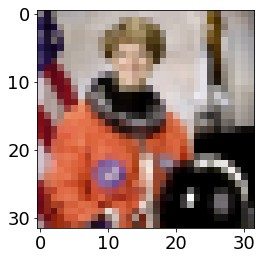

In [32]:
#print(reduce_resolution(images['astronaut'],2))
plt.imshow(reduce_resolution(images['astronaut'],4))

(100, 100, 3)


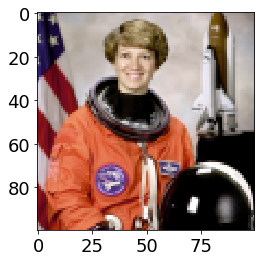

In [33]:
nimg = rescale_naive(images['astronaut'],100,100)
print(nimg.shape)
plt.imshow(nimg)

In [0]:
def get_value_naive(img,x,y):
  x = int(x)
  y = int(y)
  h,w,c = img.shape
  if(x not in range(0,h) or y not in range(0,w)):
    return np.zeros(c)
  return img[x,y]

def rotate_naive(image, theta):
  h,w,c = image.shape
  nimg = np.zeros(image.shape)
  shift_x = (h/2)*np.cos(theta)-(w/2)*np.sin(theta) - h/2
  shift_y = (h/2)*np.sin(theta)+(w/2)*np.cos(theta) - w/2
  for x in range(h):
    for y in range(w):
      ox = (x+shift_x)*np.cos(-theta)-(y+shift_y)*np.sin(-theta)
      oy = (x+shift_x)*np.sin(-theta)+(y+shift_y)*np.cos(-theta)
      nimg[x,y] = get_value_naive(image,ox,oy)
  return nimg

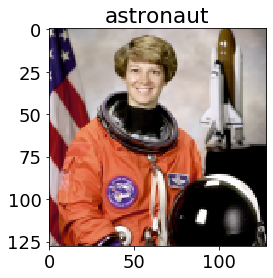

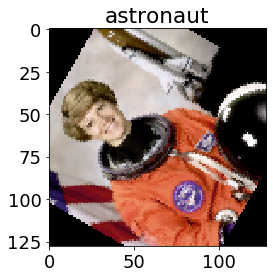

In [35]:
image = images['astronaut']
image = reduce_resolution(image, 2)
imshow(image, 'astronaut')
image = rotate_naive(image, np.pi / 3.)
imshow(image, 'astronaut')

In [0]:
def median_filter(img, n):
  h,w,c = img.shape
  nimg = np.zeros(img.shape)
  for z in range(c):
    for x in range(h-n):
      for y in range(w-n):
        nimg[x,y,z] = np.median(img[x:x+n,y:y+n,z])
  return nimg

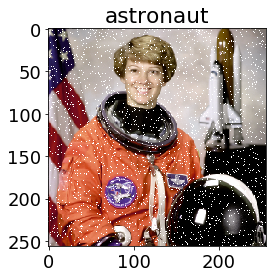

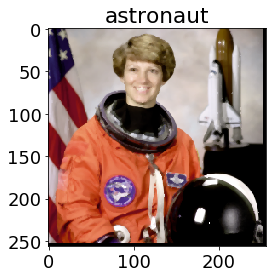

In [37]:
def salt_noise(img, t):
  img = img.copy()
  w = img.shape[0]
  h = img.shape[1]
  for i in range(w):
    for j in range(h):
      r = np.random.rand()
      if r > t:
        img[i, j, :] = 1.
  return img

image = images['astronaut']
image = reduce_resolution(image, 1)
image = salt_noise(image, 0.95)
imshow(image, 'astronaut')
image = median_filter(image, 3)
imshow(image, 'astronaut')

In [0]:
def convolution(img, kernel):
  h,w = img.shape
  hk,wk = kernel.shape
  nimg = np.zeros(img.shape)
  img = np.pad(img, [(int(np.floor(hk/2)), int(np.ceil(hk/2))), 
                     (int(np.floor(wk/2)), int(np.ceil(wk/2)))],
               'edge')
  for x in range(h):
    for y in range(w):
      nimg[x,y] = np.sum(img[x:x+hk,y:y+wk] * kernel)
  return nimg

def convert_to_gray(img):
  if img.ndim == 2: return img
  h,w,c = img.shape
  nimg = np.zeros((h,w))
  for x in range(h):
    for y in range(w):
      nimg[x,y] = np.dot(img[x,y], [0.2989, 0.5870, 0.1140])
  return nimg

def gaussian_naive(img):
  kernel = (1./273.)*np.array([[1., 4. , 7. , 4. , 1.],
                      [4., 16., 26., 16., 4.],
                      [7., 26., 41., 26., 7.],
                      [4., 16., 26., 16., 4.],
                      [1., 4. , 7. , 4. , 1.]])
  return(convolution(img, kernel))

def gaussian(img):
  kernel = np.array([[0.006, 0.061, 0.242, 0.383, 0.242, 0.061, 0.006]])
  return((convolution(img, kernel) + convolution(img, kernel.T)) / 2)

def motion_blur45(img,n):
  return(convolution(img,np.eye(n)))

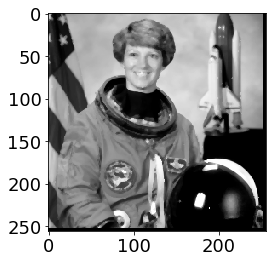

In [39]:
image = convert_to_gray(image)
plt.imshow(image, cmap='gray')

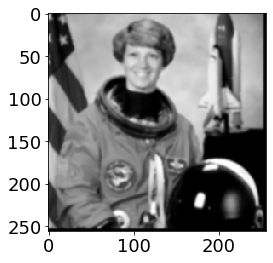

In [40]:
plt.imshow(gaussian_naive(image), cmap='gray')

In [41]:
import time
s = time.time()
gaussian_naive(image)
print(time.time() - s)
ns = time.time()
gaussian(image)
print(time.time() - ns)

0.5553183555603027
0.974247932434082


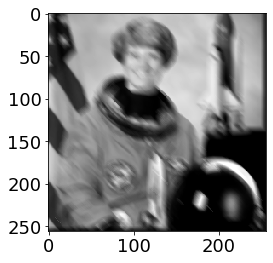

In [42]:
plt.imshow(motion_blur45(image,8), cmap='gray')

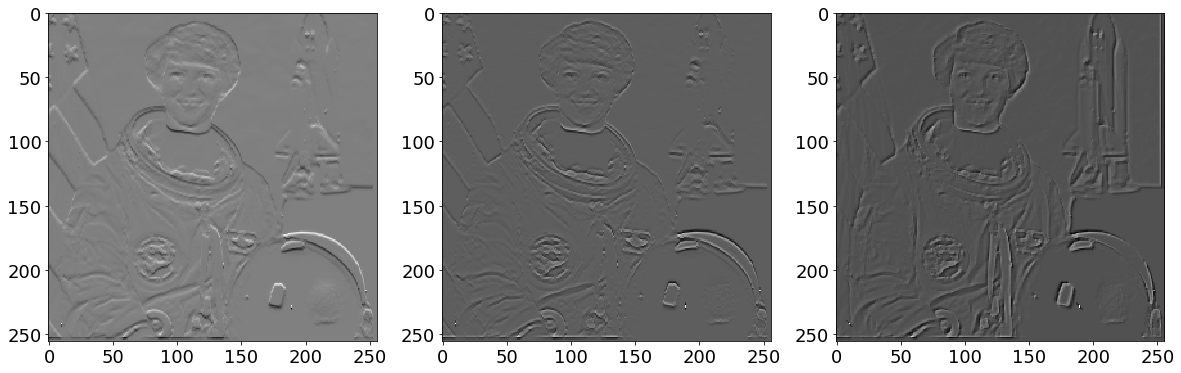

In [43]:
w1 = np.array([[0,  0, -1,  0,  0],
               [0,  0, -1,  0,  0],
               [0,  0,  2,  0,  0],
               [0,  0,  0,  0,  0],
               [0,  0,  0,  0,  0]])


w2= np.array([[0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0,  4,  0,  0],
              [0,  0, -1,  0,  0],
              [0,  0, -1,  0,  0]])


w3 = np.array([[-1,  0,  0,  0,  0],
               [ 0, -2,  0,  0,  0],
               [ 0,  0,  6,  0,  0],
               [ 0,  0,  0, -2,  0],
               [ 0,  0,  0,  0, -1]])
fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(convolution(image,w1), cmap='gray')
ax[1].imshow(convolution(image,w2), cmap='gray')
ax[2].imshow(convolution(image,w3), cmap='gray')

In [0]:
def grad_y(img):
  kernel = np.array([[-1, 0, 1], 
			              [-2, 0, 2], 
			              [-1, 0, 1]], np.float32)
  return(convolution(img, kernel))

def grad_x(img):
  kernel = np.array([[ 1,  2, 1], 
			              [ 0,  0, 0], 
			              [-1, -2, -1]], np.float32)
  return(convolution(img, kernel))

def vis_grad(img):
  nimg = np.zeros(img.shape)
  nimg[:,:,0] = 0.0
  nimg[:,:,1] = grad_x(img[:,:,1])
  nimg[:,:,2] = grad_y(img[:,:,2])
  return nimg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


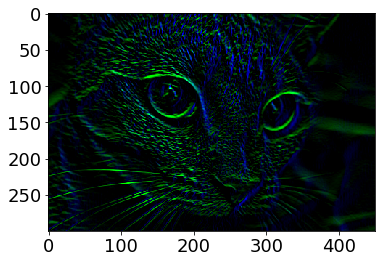

In [45]:
imshow(vis_grad(images['chelsea']))